<a href="https://colab.research.google.com/github/yesdeepakmittal/delinquencymodel/blob/main/DelinquencyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disclaimer** - *Machine learning models used in this notebook are tuned using a limited combination of hyper-parameters due to limited computing power and ease of doing the analysis faster. However, different combination with or without using other hyper-parameters can further improve the performance of these models.*

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Displaying static image https://plotly.com/python/orca-management/
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [4]:
from google.colab import files
files.upload()

Saving sample_data_intw.csv to sample_data_intw.csv


In [5]:
df = pd.read_csv('sample_data_intw.csv')
df1 = df.copy()
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


<h1>EDA</h1>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [7]:
df['pdate'] = pd.to_datetime(df['pdate'])
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [8]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset has 209593 rows and 37 columns


In [9]:
df.drop('Unnamed: 0',axis = 1,inplace=True)
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [10]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [11]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [12]:
df.label.unique()

array([0, 1])

In [13]:
df.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

<h3>Heat Map</h2>

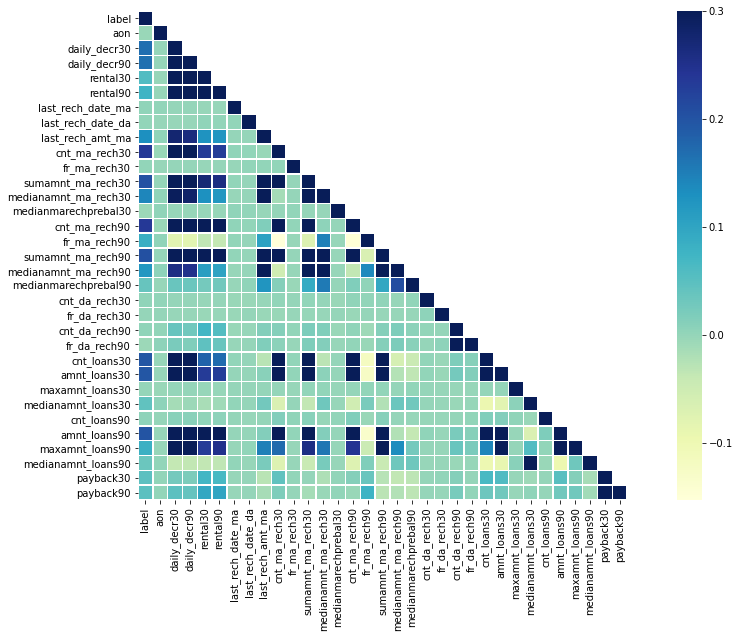

In [14]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(18,9)
_ = sns.heatmap(data = corr,square=True,annot=False,cbar=True,cmap="YlGnBu",
                vmax=0.3,mask=mask,linewidths=.5) #annot indicates digit on the tile

<h1>Data Analysis</h1>

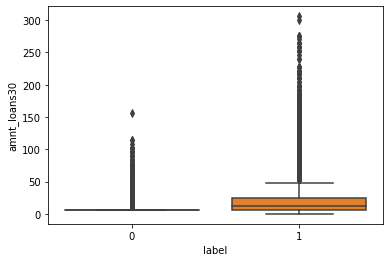

In [ ]:
sns.boxplot(x='label',y='amnt_loans30',data=df)

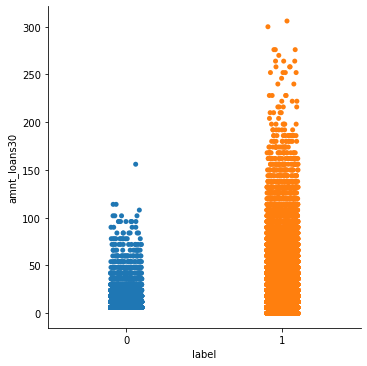

In [ ]:
sns.catplot(x='label',y='amnt_loans30',data=df)
# sns.catplot(y='label',x='amnt_loans30',data=df,kind='violin',orient='h')

**Note:-** It is less risker to loan someone whose total amount of loans in the last 30 days is greater than 100. 

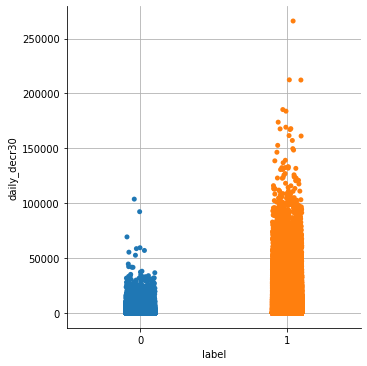

In [ ]:
sns.catplot(x='label',y='daily_decr30',data=df)
plt.grid(True)

**Note:-** It is less risker to loan someone whose 30-day average of daily amount spent from main account is greater than 40000. 

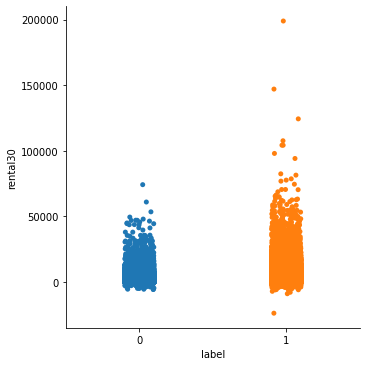

In [ ]:
sns.catplot(x='label',y='rental30',data=df)

**Note:-** It is less risker to loan someone whose average main account balance over last 30 days is greater than 50000. 

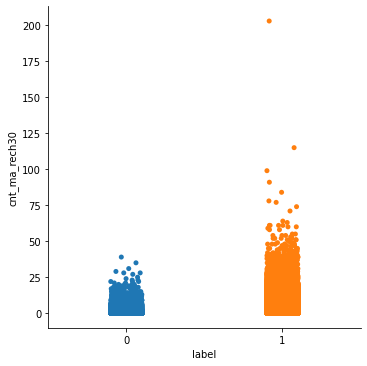

In [ ]:
sns.catplot(x='label',y='cnt_ma_rech30',data=df)

**Note:-** It is less risker to loan someone who got recharged main account for more than 25 times in the last 30 days.

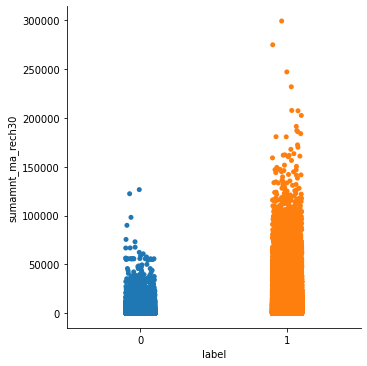

In [ ]:
temp = df[df['sumamnt_ma_rech30'] < 500000]
ax = sns.catplot(x='label',y='sumamnt_ma_rech30',data=temp)

**Note:-** It is less risker to loan someone whose total amount of recharge in the main account over last 30 days is greater than 60000. 

In [ ]:
sns.catplot?

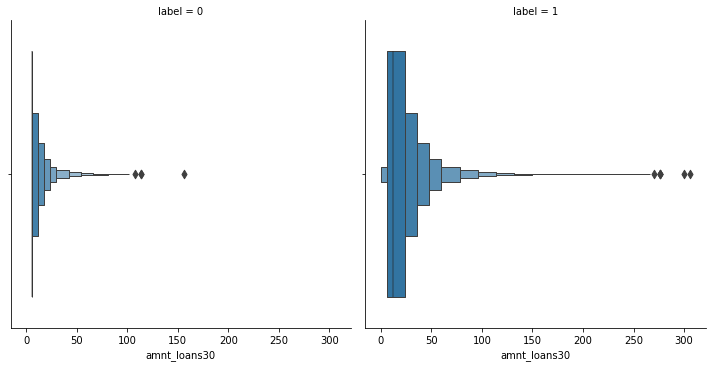

In [ ]:
sns.catplot('amnt_loans30',col='label',kind='boxen',data=df)

In [ ]:
x = df.drop(['msisdn','pcircle','pdate','label'],axis=1)
y = df['label']

<h1>Feature Engineering</h1>
<i>To train the models using normalized data, run the code cell below else leave it.</i>

In [ ]:
from sklearn.preprocessing import Normalizer
scaler=Normalizer()

x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.040558,0.455545,0.457051,0.032824,0.038789,0.000298,0.0,0.229483,0.000298,0.003131,0.458967,0.229483,0.001118,0.000298,0.003131,0.458967,0.229483,0.001118,0.0,0.0,0.0,0.0,0.000298,0.001789,0.000895,0.0,0.000298,0.001789,0.000895,0.0,0.004324,0.004324
1,0.032192,0.548083,0.548207,0.166896,0.166896,0.000904,0.0,0.261653,0.000045,0.000000,0.261653,0.261653,0.002760,0.000045,0.000000,0.261653,0.261653,0.002760,0.0,0.0,0.0,0.0,0.000045,0.000543,0.000543,0.0,0.000045,0.000543,0.000543,0.0,0.000000,0.000000
2,0.127283,0.332602,0.332602,0.214152,0.214152,0.000714,0.0,0.366148,0.000238,0.000000,0.366148,0.366148,0.015778,0.000238,0.000000,0.366148,0.366148,0.015778,0.0,0.0,0.0,0.0,0.000238,0.001427,0.001427,0.0,0.000238,0.001427,0.001427,0.0,0.000000,0.000000
3,0.143966,0.012681,0.012681,0.095233,0.095233,0.024492,0.0,0.565709,0.000000,0.000000,0.000000,0.000000,0.000000,0.000597,0.000000,0.565709,0.565709,0.001493,0.0,0.0,0.0,0.0,0.001195,0.007168,0.003584,0.0,0.001195,0.007168,0.003584,0.0,0.000000,0.000000
4,0.030319,0.004822,0.004822,0.035182,0.035182,0.000128,0.0,0.073925,0.000224,0.000064,0.641247,0.073925,0.000928,0.000256,0.000064,0.752247,0.092462,0.001121,0.0,0.0,0.0,0.0,0.000224,0.001345,0.000192,0.0,0.000224,0.001345,0.000192,0.0,0.000075,0.000075


<h1>Data Splitting</h1>

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=101)

In [17]:
x_train.shape

(167674, 32)

<h1>Modelling</h1>

In [18]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV

In [19]:
# class myalgos:
#     def __init__(self,model,name,index):
#         self.model = model
#         self.name = name
#         self.index = index

#     def model_(self):
#         self.model.fit(x_train,y_train.reshape(-1,))
#         y_pred = self.model.predict(x_test)
#         model_accuracy = accuracy_score(y_test,y_pred) * 100

# model = myalgos('model_here','name_herer','index_here')
# model.model_()

<h3>⭐Extremely Randomized Trees Classifier(Extra Trees Classifier)</h3>

In [22]:
from sklearn.ensemble import ExtraTreesClassifier
param_grid = {
                'n_estimators' : [10,25,50,100],
                'criterion' : ['gini','entropy'] # 4 x 2 x 5(cv) = 40
            }

In [23]:
grid = GridSearchCV(ExtraTreesClassifier(), param_grid, refit = True, verbose = 3) #cv = 5
grid.fit(x_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... criterion=gini, n_estimators=10, score=0.899, total=   2.5s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ..... criterion=gini, n_estimators=10, score=0.901, total=   2.5s
[CV] criterion=gini, n_estimators=10 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV] ..... criterion=gini, n_estimators=10, score=0.901, total=   2.4s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.901, total=   2.5s
[CV] criterion=gini, n_estimators=10 .................................
[CV] ..... criterion=gini, n_estimators=10, score=0.904, total=   2.6s
[CV] criterion=gini, n_estimators=25 .................................
[CV] ..... criterion=gini, n_estimators=25, score=0.906, total=   6.2s
[CV] criterion=gini, n_estimators=25 .................................
[CV] ..... criterion=gini, n_estimators=25, score=0.906, total=   6.1s
[CV] criterion=gini, n_estimators=25 .................................
[CV] ..... criterion=gini, n_estimators=25, score=0.906, total=   6.1s
[CV] criterion=gini, n_estimators=25 .................................
[CV] ..... criterion=gini, n_estimators=25, score=0.906, total=   6.1s
[CV] criterion=gini, n_estimators=25 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.9min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=None,
                                            verbose=0, warm_start=False),
             iid='deprec

In [24]:
print(grid.best_params_) 
print(grid.best_estimator_)

{'criterion': 'entropy', 'n_estimators': 100}
ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


In [25]:
ETF = ExtraTreesClassifier(n_estimators = grid.best_params_['n_estimators'], 
                        criterion =grid.best_params_['criterion'],
                         max_features = 'auto')  #x_train.shape[1]) | auto = sqrt(n_features)
ETF.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [26]:
fi = ETF.feature_importances_
fi_normalized = np.std([tree.feature_importances_ for tree in 
                                        ETF.estimators_], 
                                        axis = 0) 
fi

array([0.07015969, 0.10992036, 0.1045947 , 0.06827477, 0.06608094,
       0.04638967, 0.00360879, 0.02652596, 0.03648285, 0.01704549,
       0.03574497, 0.0258063 , 0.0360648 , 0.03926106, 0.03921005,
       0.03433757, 0.0247505 , 0.04257785, 0.00279348, 0.00181496,
       0.00345459, 0.00089723, 0.0286841 , 0.03225198, 0.00232799,
       0.00474415, 0.00815393, 0.0279052 , 0.01023164, 0.00408038,
       0.0203934 , 0.02543067])

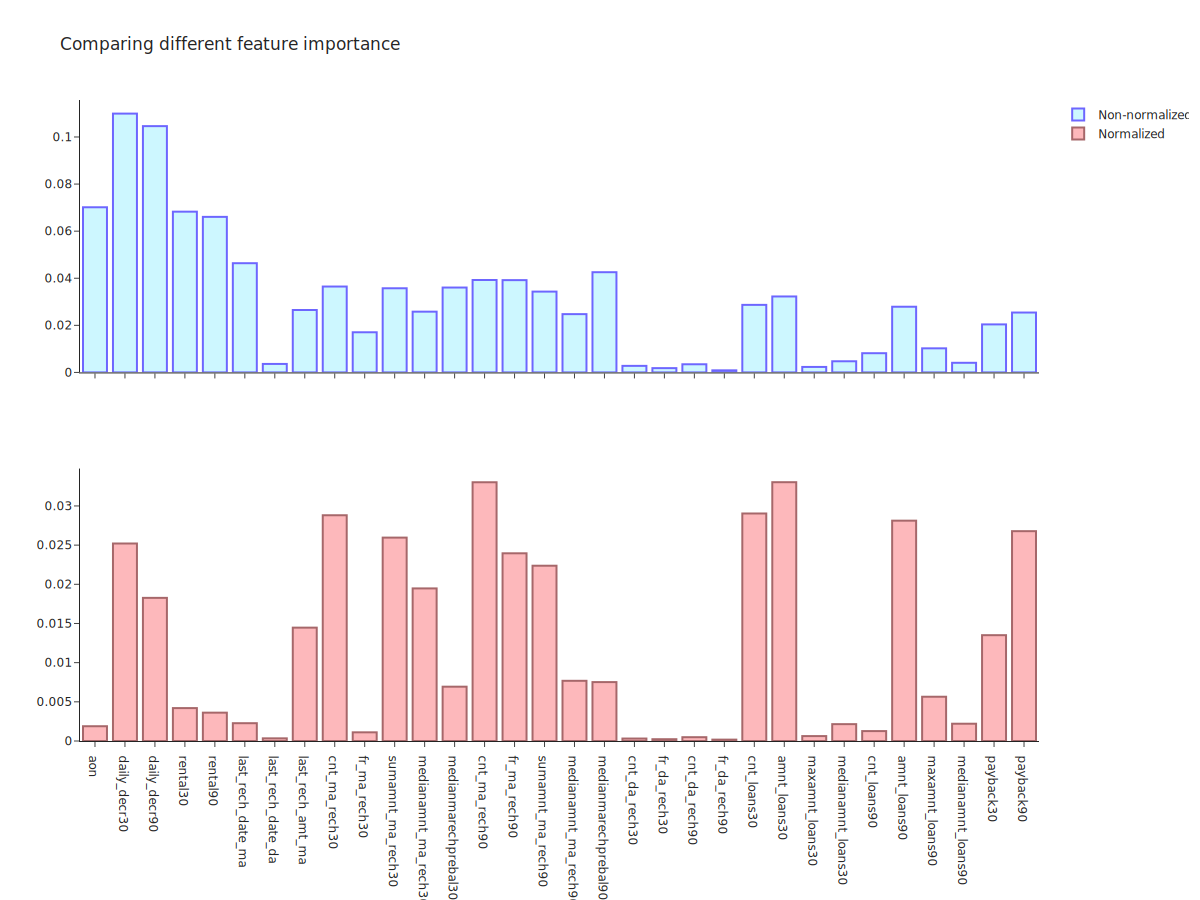

In [71]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True)

fig.add_trace(go.Bar(x=x.columns,y=fi,name='Non-normalized',
                        marker_color='rgb(171,241,255)',marker_line_color='rgb(12,0,335)',
                        marker_line_width=2, opacity=0.6),
                row=1,col=1)

fig.add_trace(go.Bar(x=x.columns,y=fi_normalized,name='Normalized',
                        marker_color='#fc888d',marker_line_color='#6b0206',
                        marker_line_width=2, opacity=0.6),
                row=2,col=1)
fig.update_layout(template='simple_white',title='Comparing different feature importance',height=900)
fig.show()
fig.show('svg',height=900,width=1200)

In [32]:
ETF_y_pred = ETF.predict(x_test)
ETF_accuracy = accuracy_score(ETF_y_pred,y_test)
ETF_recall = recall_score(ETF_y_pred,y_test)
ETF_precision = precision_score(ETF_y_pred,y_test)
print(classification_report(ETF_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(ETF_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.43      0.74      0.54      3033
           1       0.98      0.92      0.95     38886

    accuracy                           0.91     41919
   macro avg       0.70      0.83      0.75     41919
weighted avg       0.94      0.91      0.92     41919

Confusion Matrix:
 [[ 2256   777]
 [ 3017 35869]]


<h3>⭐Random Forest Classifier</h3>

Bagging(ex. random forest):- handles overfitting, reduce variance, independent classifiers

In [34]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {
                'n_estimators':[10,25,50,100],
                'criterion':['gini','entropy'],
                'n_jobs':[-1], # -1 indicates the processing in parallel using all CPUs
                'max_features':['auto','log2',None] #4 x 2 x 3 x 5(cv) = 120 fits
}

In [35]:
RFC_grid = GridSearchCV(RandomForestClassifier(), param_grid, refit = True, verbose = 3)
RFC_grid.fit(x_train, y_train) 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1 ...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1, score=0.905, total=   4.7s
[CV] criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1 ...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.7s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1, score=0.905, total=   3.7s
[CV] criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1 ...


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.3s remaining:    0.0s


[CV]  criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1, score=0.907, total=   3.5s
[CV] criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1 ...
[CV]  criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1, score=0.906, total=   3.5s
[CV] criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1 ...
[CV]  criterion=gini, max_features=auto, n_estimators=10, n_jobs=-1, score=0.908, total=   3.5s
[CV] criterion=gini, max_features=auto, n_estimators=25, n_jobs=-1 ...
[CV]  criterion=gini, max_features=auto, n_estimators=25, n_jobs=-1, score=0.911, total=   8.8s
[CV] criterion=gini, max_features=auto, n_estimators=25, n_jobs=-1 ...
[CV]  criterion=gini, max_features=auto, n_estimators=25, n_jobs=-1, score=0.910, total=   9.0s
[CV] criterion=gini, max_features=auto, n_estimators=25, n_jobs=-1 ...
[CV]  criterion=gini, max_features=auto, n_estimators=25, n_jobs=-1, score=0.912, total=   8.7s
[CV] criterion=gini, max_features=auto, n_estimators=25, n_jobs=-1 ..

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 87.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [37]:
print(RFC_grid.best_params_) 
print(RFC_grid.best_estimator_) 

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100, 'n_jobs': -1}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [39]:
RFC = RandomForestClassifier(n_estimators = RFC_grid.best_params_['n_estimators'],
                             criterion = RFC_grid.best_params_['criterion'],
                             max_features = RFC_grid.best_params_['max_features'],
                             n_jobs = RFC_grid.best_params_['n_jobs'])
RFC.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [40]:
RFC_y_pred = RFC.predict(x_test)
RFC_accuracy = accuracy_score(RFC_y_pred,y_test)
RFC_recall = recall_score(RFC_y_pred,y_test)
RFC_precision = precision_score(RFC_y_pred,y_test)
print(classification_report(RFC_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(RFC_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.77      0.56      3033
           1       0.98      0.92      0.95     38886

    accuracy                           0.91     41919
   macro avg       0.71      0.84      0.76     41919
weighted avg       0.94      0.91      0.92     41919

Confusion Matrix:
 [[ 2321   712]
 [ 2952 35934]]


<h3>⭐Gradient Boosting Classifier</h3>

Boosting(ex. gradient boosting):- can overfit, reduce bias & variance, sequential classifier. 

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=10)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [42]:
GBC.feature_importances_

array([9.62251001e-03, 9.25135684e-02, 5.32308363e-01, 1.64473482e-02,
       4.00856129e-02, 2.38620049e-02, 0.00000000e+00, 5.99404545e-04,
       7.54464764e-05, 0.00000000e+00, 3.21844687e-02, 7.26719574e-03,
       4.31067584e-03, 8.40637936e-02, 4.25982371e-04, 8.44635200e-02,
       1.07478149e-03, 1.77789786e-02, 0.00000000e+00, 0.00000000e+00,
       1.62629199e-05, 1.34513891e-04, 4.28940671e-03, 5.03619999e-03,
       3.28477742e-04, 3.40179742e-03, 2.67685659e-03, 1.16704069e-02,
       4.32007096e-03, 2.26390425e-03, 1.45836720e-03, 1.73200811e-02])

In [43]:
GBC_y_pred = GBC.predict(x_test)
GBC_accuracy = accuracy_score(GBC_y_pred,y_test)
GBC_recall = recall_score(GBC_y_pred,y_test)
GBC_precision = precision_score(GBC_y_pred,y_test)
print(classification_report(GBC_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(GBC_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.35      0.81      0.49      2253
           1       0.99      0.91      0.95     39666

    accuracy                           0.91     41919
   macro avg       0.67      0.86      0.72     41919
weighted avg       0.95      0.91      0.92     41919

Confusion Matrix:
 [[ 1835   418]
 [ 3438 36228]]


<h3>⭐Logistics Regression</h3>

In [44]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=10,max_iter=200)
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
lr_y_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(lr_y_pred,y_test)
lr_recall = recall_score(lr_y_pred,y_test)
lr_precision = precision_score(lr_y_pred,y_test)
print(classification_report(lr_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(lr_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.18      0.51      0.26      1869
           1       0.97      0.89      0.93     40050

    accuracy                           0.87     41919
   macro avg       0.58      0.70      0.60     41919
weighted avg       0.94      0.87      0.90     41919

Confusion Matrix:
 [[  944   925]
 [ 4329 35721]]


<h3>⭐Decision Tree Classifier</h3>

In [46]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=10)
DTC.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [63]:
DTC_y_pred = DTC.predict(x_test)
DTC_accuracy = accuracy_score(DTC_y_pred,y_test)
DTC_recall = recall_score(DTC_y_pred,y_test)
DTC_precision = precision_score(DTC_y_pred,y_test)
print(classification_report(DTC_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(DTC_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48      5569
           1       0.92      0.93      0.92     36350

    accuracy                           0.87     41919
   macro avg       0.71      0.70      0.70     41919
weighted avg       0.86      0.87      0.86     41919

Confusion Matrix:
 [[ 2617  2952]
 [ 2656 33694]]


<h3>⭐Support Vector Machine - SVC</h3>

In [57]:
# from sklearn.svm import SVC
# SVC = SVC()
# SVC.fit(x_train,y_train)

In [59]:
from sklearn.svm import LinearSVC  #~SVC(kernel = 'linear')
SVC = LinearSVC()
SVC.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [65]:
SVC_y_pred = SVC.predict(x_test)
SVC_accuracy = accuracy_score(SVC_y_pred,y_test)
SVC_recall = recall_score(SVC_y_pred,y_test)
SVC_precision = precision_score(SVC_y_pred,y_test)
print(classification_report(SVC_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(SVC_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.14      0.18      0.16      4155
           1       0.91      0.88      0.89     37764

    accuracy                           0.81     41919
   macro avg       0.52      0.53      0.52     41919
weighted avg       0.83      0.81      0.82     41919

Confusion Matrix:
 [[  737  3418]
 [ 4536 33228]]


<h1>⭐KNN</h1>

In [51]:
# from sklearn.neighbors import KNeighborsClassifier
# param_grid = {
#                 'n_neighbors':[5,10,15,20],
#                 'weights':['uniform', 'distance'],
#                 'n_jobs':[-1]
# }

In [ ]:
# KNN_grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
# KNN_grid.fit(x_train, y_train) 

In [ ]:
# print(KNN_grid.best_params_) 
# print(KNN_grid.best_estimator_) 

In [ ]:
# KNN = KNeighborsClassifier(n_neighbors = KNN_grid.best_params_['n_neighbors'],
#                            weights = KNN_grid.best_params_['weights'],
#                            n_jobs = KNN_grid.best_params_['n_jobs'])
# KNN.fit(x_train,y_train)

In [54]:
KNN = KNeighborsClassifier(n_jobs=-1)
KNN.fit(x_train,y_train)
#p = euclidien distance
#weights = uniform: Equal importance to each neighbor

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [55]:
KNN_y_pred = KNN.predict(x_test)
KNN_accuracy = accuracy_score(KNN_y_pred,y_test)
KNN_recall = recall_score(KNN_y_pred,y_test)
KNN_precision = precision_score(KNN_y_pred,y_test)
print(classification_report(KNN_y_pred,y_test))
print('Confusion Matrix:\n',confusion_matrix(KNN_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.33      0.55      0.41      3192
           1       0.96      0.91      0.93     38727

    accuracy                           0.88     41919
   macro avg       0.65      0.73      0.67     41919
weighted avg       0.91      0.88      0.89     41919

Confusion Matrix:
 [[ 1750  1442]
 [ 3523 35204]]


<h1>Prediction - One View</h1>

In [66]:
models = ['ExtraTreeClassifier','RandomForestClassifier','GradientBoostingClassifier',
          'LogisticsRegression','DecisionTreeClassifier','SVC','KNN']

acc_score = [ETF_accuracy,RFC_accuracy,GBC_accuracy,lr_accuracy,DTC_accuracy,SVC_accuracy,KNN_accuracy]
pre_score = [ETF_precision,RFC_precision,GBC_precision,lr_precision,DTC_precision,SVC_precision,KNN_precision]
rec_score = [ETF_recall,RFC_recall,GBC_recall,lr_recall,DTC_recall,SVC_recall,KNN_recall]

data = pd.DataFrame({'models':models,
                     'accuracy_score':acc_score,
                     'precision_score':pre_score,
                     'recall_score':rec_score})
data.sort_values(by='accuracy_score',ascending=False)

,models,accuracy_score,precision_score,recall_score
1,RandomForestClassifier,0.912593,0.980571,0.924086
0,ExtraTreeClassifier,0.909492,0.978797,0.922414
2,GradientBoostingClassifier,0.908013,0.988594,0.913326
6,KNN,0.881557,0.960651,0.909030
3,LogisticsRegression,0.874663,0.974759,0.891910
4,DecisionTreeClassifier,0.866218,0.919446,0.926933
5,SVC,0.810253,0.906729,0.879886
